# 26th April Assignment

In [1]:
!pip install ucimlrepo

In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
  
wine = fetch_ucirepo(id=109) 

x = pd.DataFrame(wine.data.features) 
y = pd.DataFrame(wine.data.targets)

## Missing Values

In [3]:
x.isnull().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
x = scaler.fit_transform(x)

## Implementing PCA

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=3)

In [9]:
x_pca = pca.fit_transform(x)

In [10]:
x_pca.shape

(178, 3)

## Applying Clustering Algorithm

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
from sklearn.cluster import KMeans

In [42]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)

In [43]:
!pip install kneed

In [44]:
from kneed import KneeLocator

In [46]:
knee = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
knee.elbow

3

In [56]:
Kmeans = KMeans(n_clusters=3,init='k-means++')

In [57]:
Kmeans.fit(x_pca)

KMeans(n_clusters=3)

## Performance Matrics - Silhouette Score

In [59]:
from sklearn.metrics import silhouette_score

In [60]:
silhouette_scores = []

for i in range(2,11) :
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x_pca)
    scores = silhouette_score(x_pca,kmeans.labels_)
    silhouette_scores.append(scores)

In [61]:
silhouette_scores

[0.3893881308900331,
 0.4537999848257614,
 0.4110296819768858,
 0.39050750391834077,
 0.32325061590308934,
 0.327780786155753,
 0.30275404013072654,
 0.3013113486527954,
 0.2848284663038974]

## Visualization

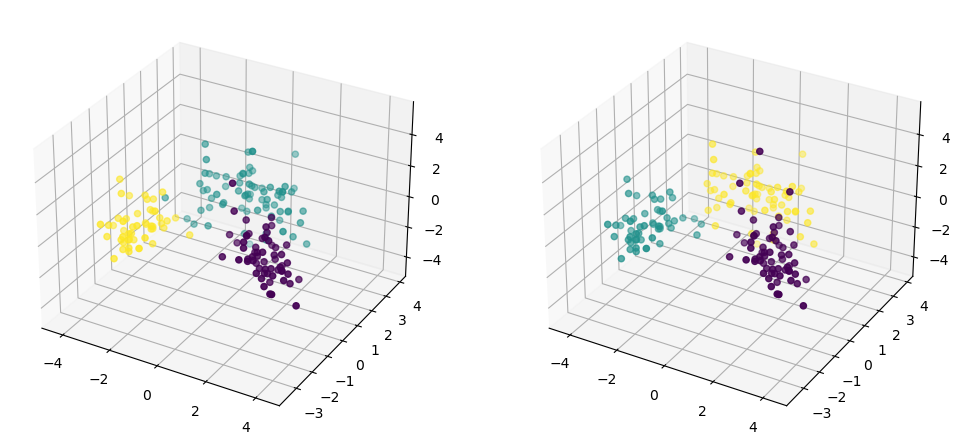

In [58]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 7))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=y, cmap='viridis')

ax = fig.add_subplot(122, projection='3d')
ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=Kmeans.labels_, cmap='viridis')

plt.show()